# State Farm Distracted Driver Detection


[State Farm Distracted Driver Detection](https://www.kaggle.com/c/state-farm-distracted-driver-detection#evaluation)

## Action Plan
### 1. Data Preparation and Preprocessing
### 2. Finetune and Train Model
### 3. Generate and Validate Predictions 
### 4. Submit predictions to Kaggle

## 3. Generate and Validate Predictions

## Setup 

In [2]:
%cd "~/kaggle/state-farm-driver-detection/code"
%pwd

/home/ubuntu/kaggle/state-farm-driver-detection/code


'/home/ubuntu/kaggle/state-farm-driver-detection/code'

In [3]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
CODE_HOME_DIR = current_dir
DATA_HOME_DIR = CODE_HOME_DIR + '/../input/'
print(CODE_HOME_DIR)
print(DATA_HOME_DIR)

/home/ubuntu/kaggle/state-farm-driver-detection/code
/home/ubuntu/kaggle/state-farm-driver-detection/code/../input/


In [4]:
#import modules
#from importlib import reload

import utils
from utils import *

import vgg16bn_ted
from vgg16bn_ted import Vgg16BN; 

%matplotlib inline

Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


#### Setup Paths

In [5]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/' # + '/sample/' 
results_path = path + 'results/'
train_path = path + 'train/'
valid_path = path + 'valid/'
test_path = path + 'test/'
model_path = path + 'models/'
if not os.path.exists(model_path): os.makedirs(model_path)
    
batch_size = 64

/home/ubuntu/kaggle/state-farm-driver-detection/input


#### Setup and save Data Classes, Labels, and Filenames

In [6]:
(trn_classes, val_classes, trn_labels, val_labels, trn_filenames, val_filenames, test_filenames) = get_classes(path)

Found 17940 images belonging to 10 classes.
Found 4484 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


## Load model and weights from last step: 3.modelTuning 

In [7]:
vgg = Vgg16BN(size=(256, 256))

#Finetune the model
vgg.finetune(vgg.get_batches(train_path, shuffle=False, batch_size=batch_size))
model = vgg.model

Found 17940 images belonging to 10 classes.


In [8]:
model_name = 'Vgg16BN-ted'
sub_model_name = ''
#model.load_weights(model_path + model_name + '_dropout1.h5')
model.load_weights(model_path + model_name + '_aug1.h5')

## 4. Generate predictions

## 5. Validate predictions

In [14]:
val_batches, probs = vgg.test(valid_path, batch_size)

Found 4484 images belonging to 10 classes.


In [ ]:
#val_filenames = val_batches.filenames

In [26]:
save_array(results_path + 'val_preds.dat', probs)
save_array(results_path + 'val_filenames.dat', val_filenames)

In [27]:
probs = load_array(results_path + 'val_preds.dat')
val_filenames = load_array(results_path + 'val_filenames.dat')

In [28]:
# get class indices of all classes 
classes = vgg.classes
# fact
expected_labels = val_batches.classes #classes
expected_label_indices = np.array([classes[int(expected_labels[i])] for i in range(len(expected_labels))])
# predict
our_prediction_idxs = np.argmax(probs, axis=1)
our_prediction_probs = np.array([probs[i, our_prediction_idxs[i]] for i in range(len(our_prediction_idxs))])
our_prediction_labels = our_prediction_idxs
our_prediction_label_indices = np.array([classes[idx] for idx in our_prediction_idxs])

In [29]:
class_dicts = {
    'c0': 'normal driving', 
    'c1': 'texting - right',
    'c2': 'talking on the phone - right',
    'c3': 'texting - left',
    'c4': 'talking on the phone - left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger',
}

In [78]:
def plots_labels(ims, figsize=(20,8), rows=1, interp=False, expected_labels=None, our_labels=None, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    #cols = len(ims)//rows if len(ims) % rows == 0 else len(ims)//rows + 1
    cols = int(math.ceil(len(ims)/rows))
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        f.subplots_adjust(top=2.5)
        sp.axis('Off')
        if expected_labels is not None and our_labels is not None:
            sp.set_title('F: '+expected_labels[i] + '- ' + class_dicts[expected_labels[i]]+
                         '\nP: '+our_labels[i] +'- ' + class_dicts[our_labels[i]], fontsize=10)
        elif titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

        
def plots_idx(idxs, expected_labels=None, our_labels=None, titles=None, rows=1):
    print(idxs)
    plots_labels([image.load_img(valid_path+val_filenames[i]) for i in idxs], rows=rows,
                 expected_labels=expected_labels, our_labels=our_labels,
                titles=titles)
                

In [79]:
n_view = 4

Found 4457 correct labels
[3078  998   70 4037]


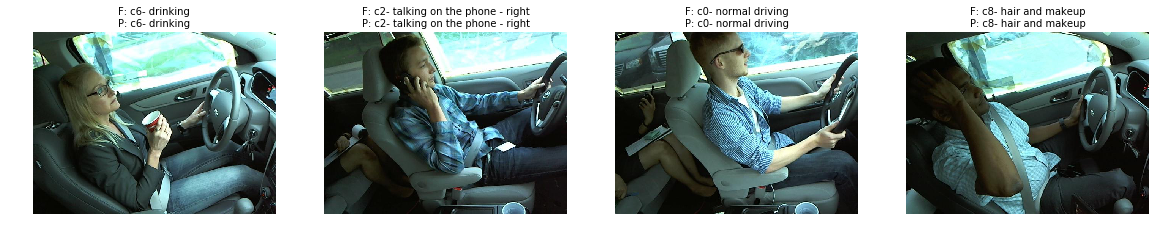

In [80]:
#1. A few correct labels at random
correct = np.squeeze(np.where(our_prediction_labels==expected_labels))
print("Found {} correct labels".format(len(correct)))
idxs = permutation(correct)[:n_view]
if len(correct):
    plots_idx(idxs, expected_label_indices[idxs], our_prediction_label_indices[idxs])

Found 27 incorrect labels
[9 9 8 8 8 8 8 7 7 7 7 6 6 6 6 5 4 4 4 4 4 3 3 3 2 0 0]
[4170 4078 3888 3862 3836 3758 3727 3542 3516 3455 3365 3230 3143 2841 2837
 2538 2268 2265 2231 2009 1874 1700 1530 1394  970  395  174]


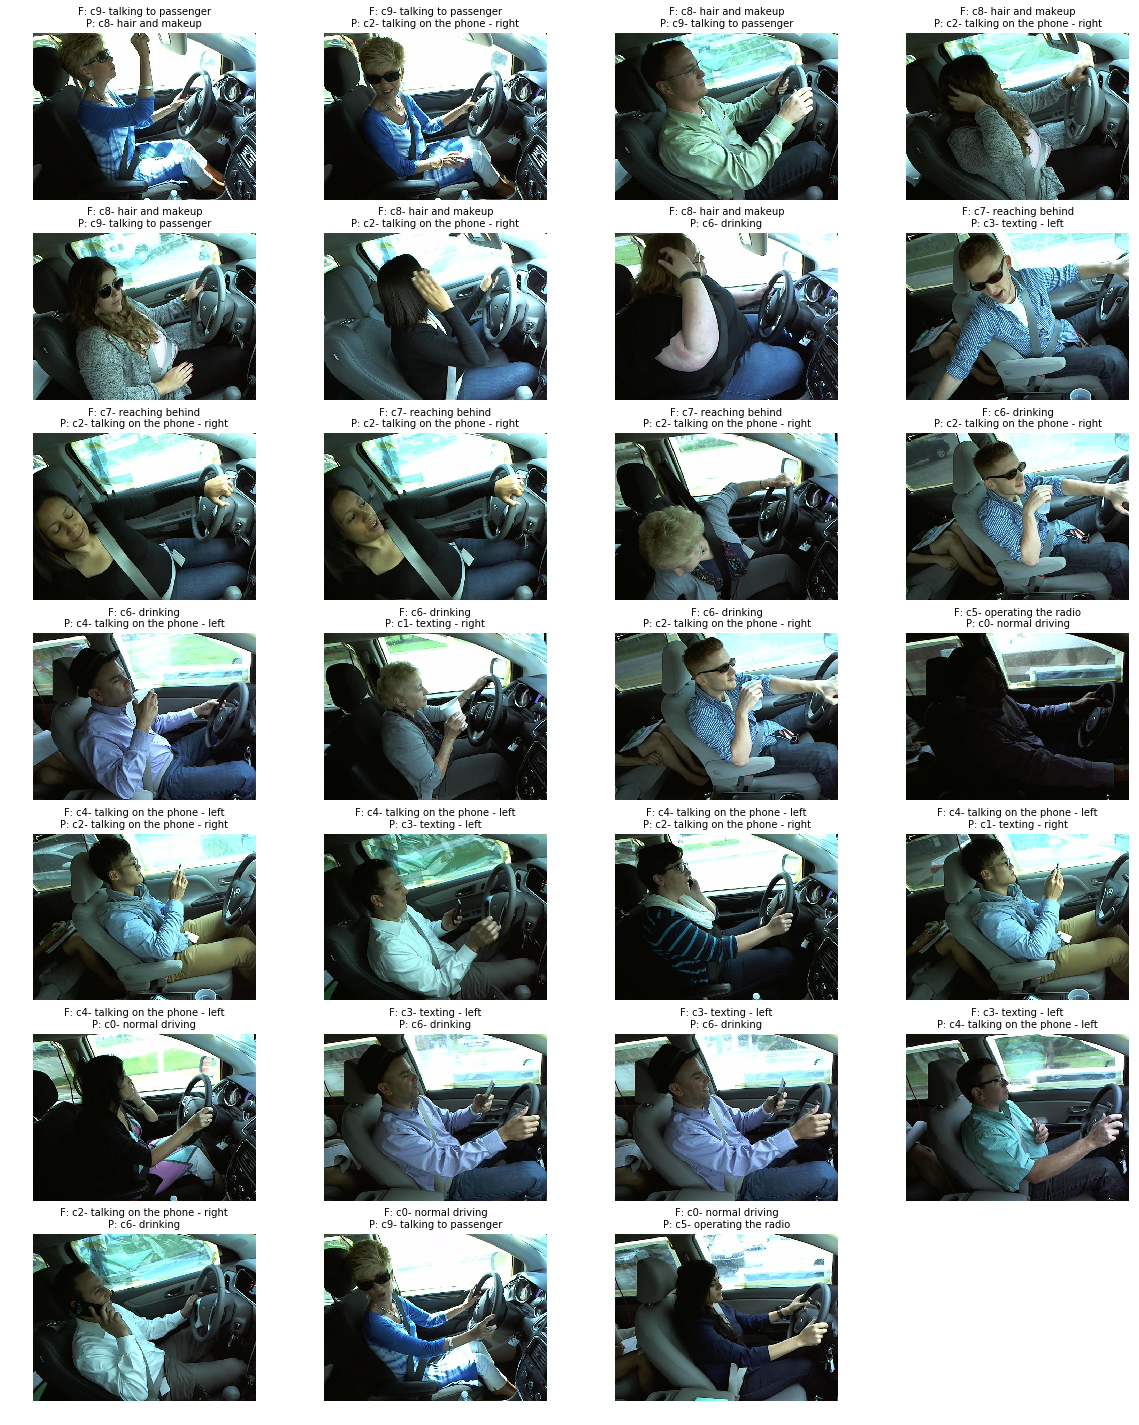

In [83]:
#2. A few incorrect labels at random
incorrect = np.squeeze(np.where(our_prediction_labels!=expected_labels))
print("Found {} incorrect labels".format(len(incorrect)))
idxs = incorrect[::-1]#permutation(incorrect)[:n_view]
if len(incorrect):
    plots_idx(idxs, expected_label_indices[idxs], our_prediction_label_indices[idxs], rows=7)

[4483 1499 1493 1494]


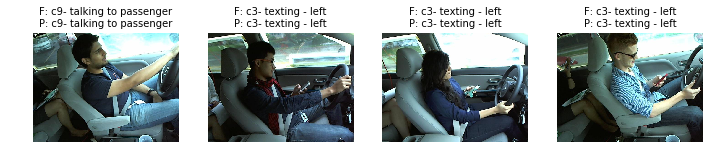

In [34]:
#3. The images we most confident were any class, and are actually this class
correct = np.squeeze(np.where(our_prediction_labels==expected_labels))
most_correct = np.argsort(our_prediction_probs[correct])[::-1][:n_view]
if len(most_correct):
    plots_idx(correct[most_correct], expected_label_indices[correct[most_correct]], 
              our_prediction_label_indices[correct[most_correct]])

[ 174 3365 1530 2268  970 2837 4078 3143 3230 3455 1700 3516 3542 3727 3758
 3836 3862  395 2231 4170 2841 3888 1394 2265 1874 2009 2538]


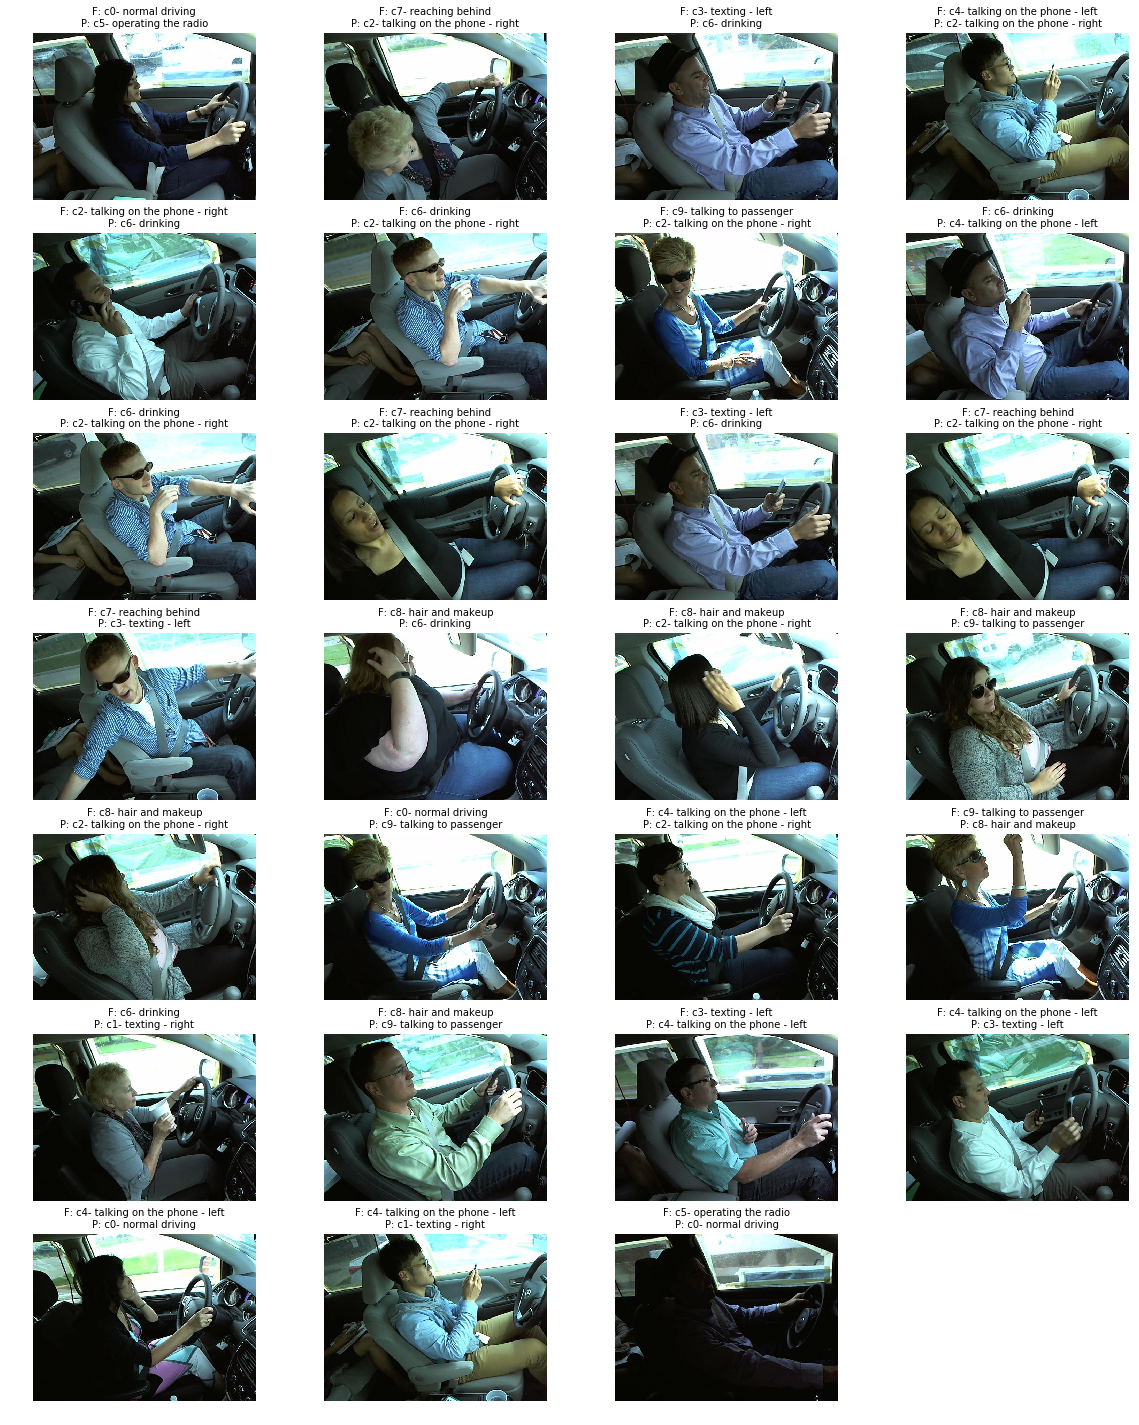

In [84]:
#4. The images we most confident were any class, but are actually not this class
incorrect = np.squeeze(np.where(our_prediction_labels!=expected_labels))
most_incorrect = np.argsort(our_prediction_probs[incorrect])[::-1] # [:n_view]
if len(most_incorrect):
    plots_idx(incorrect[most_incorrect], expected_label_indices[incorrect[most_incorrect]], 
              our_prediction_label_indices[incorrect[most_incorrect]], rows=7)

[1572 2538 3656 2009]


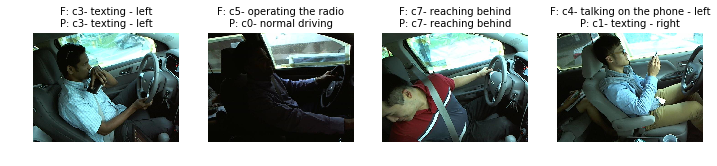

In [36]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_prediction_probs-0.5))[:n_view]
if len(most_uncertain):
    plots_idx(most_uncertain, expected_label_indices[most_uncertain], our_prediction_label_indices[most_uncertain])

### Confusion matrix

In [91]:
import itertools
from itertools import chain

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting 'normalize=True'
        (This function is copied from scikit docs: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py)
        
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #fmt = '.2f' if normalize else 'd'
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_prediction_labels)

Confusion matrix, without normalization
[[453   0   0   0   0   1   0   0   0   1]
 [  0 456   0   0   0   0   0   0   0   0]
 [  0   0 463   0   0   0   1   0   0   0]
 [  0   0   0 488   1   0   2   0   0   0]
 [  1   1   2   1 442   0   0   0   0   0]
 [  1   0   0   0   0 475   0   0   0   0]
 [  0   1   2   0   1   0 471   0   0   0]
 [  0   0   3   1   0   0   0 411   0   0]
 [  0   0   2   0   0   0   1   0 365   2]
 [  0   0   1   0   0   0   0   0   1 433]]


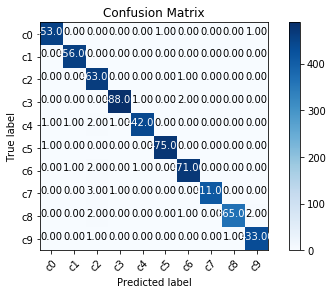

In [93]:
plot_confusion_matrix(cm, val_batches.class_indices)